## This dataset is of an Mall Customers with observations and variables.¶
- The data contain features(columns) for good customer(Cx) segmentation by givig  CustomerID ,gender,age,annual income(k$),and spending score(1-100).


### Objective: Our aim is to find best customer segmentation using these features and get the conclusion how many segment of customer we have and there spending money behaviour in Mall while they visit.

## Import Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore') # setting ignore as a parameter

In [5]:
cx_df = pd.read_csv('Proj3_MallCustomers_Data_Project.csv')

In [6]:
cx_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
cx_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
cx_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
cx_df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X = cx_df.drop(columns=['CustomerID', 'Gender', 'Age'], axis=1).values    #.values numpy mein convert ho jayega 

In [ ]:
# annual income spending score are relevant 

In [12]:
X[...,0]

array([ 15,  15,  16,  16,  17,  17,  18,  18,  19,  19,  19,  19,  20,
        20,  20,  20,  21,  21,  23,  23,  24,  24,  25,  25,  28,  28,
        28,  28,  29,  29,  30,  30,  33,  33,  33,  33,  34,  34,  37,
        37,  38,  38,  39,  39,  39,  39,  40,  40,  40,  40,  42,  42,
        43,  43,  43,  43,  44,  44,  46,  46,  46,  46,  47,  47,  48,
        48,  48,  48,  48,  48,  49,  49,  50,  50,  54,  54,  54,  54,
        54,  54,  54,  54,  54,  54,  54,  54,  57,  57,  58,  58,  59,
        59,  60,  60,  60,  60,  60,  60,  61,  61,  62,  62,  62,  62,
        62,  62,  63,  63,  63,  63,  63,  63,  64,  64,  65,  65,  65,
        65,  67,  67,  67,  67,  69,  69,  70,  70,  71,  71,  71,  71,
        71,  71,  72,  72,  73,  73,  73,  73,  74,  74,  75,  75,  76,
        76,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  79,  79,  81,  81,  85,  85,  86,  86,  87,
        87,  87,  87,  87,  87,  88,  88,  88,  88,  93,  93,  9

### Visulize

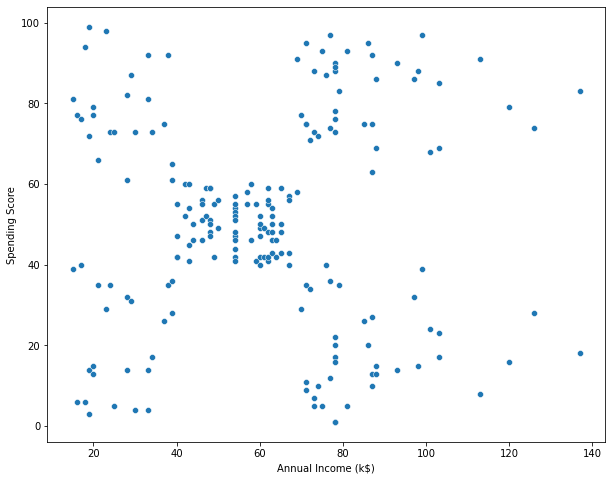

In [11]:
plt.figure(figsize=(10,8))
sns.scatterplot(X[:,0],X[:,1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

In [14]:
from sklearn.cluster import Kmeans

ImportError: cannot import name 'Kmeans' from 'sklearn.cluster' (C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\__init__.py)

### Find the K using the Elbow Method


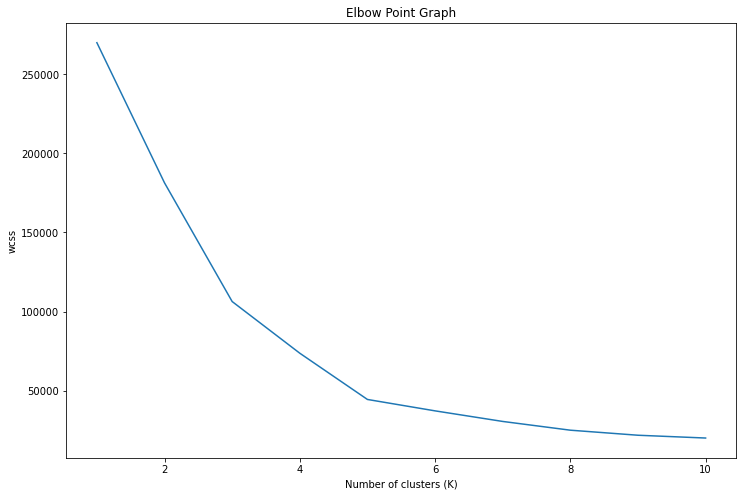

In [16]:
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=2)  # kmeans ++ centroid ki posoition change nai hona chaheye
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)    # yaha taak run kiya toh error kitna h voh define karta h
plt.figure(figsize=(12,8))
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters (K)')
plt.ylabel('wcss')
plt.show()

#### optimum cluster should be 5

#### we will fit data according to K=5

#### If value of cluster K is 1 wcss score is very high value  and if we look at k = 5 or after it wcss is decreasing slowly which means this should be the optimius value of k that  is 5 . 

### Training the K-mean algorith on trainingi dataset

In [22]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)          
Y = kmeans.fit_predict(X)

In [23]:
Y                     # category define karta h

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
X          # agar uska spending score 39  and income 15 h h toh voh upar 4th catgeory mein atta h

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [26]:
X[Y==0,0]    # category 0 walo ki income 

array([ 70,  71,  71,  73,  73,  74,  75,  77,  77,  78,  78,  78,  78,
        78,  78,  79,  81,  85,  86,  87,  87,  87,  88,  88,  93,  97,
        98,  99, 101, 103, 103, 113, 120, 126, 137], dtype=int64)

In [27]:
X[Y==0,1]    # category 0 walo ki spending score 

array([29, 11,  9,  5,  7, 10,  5, 12, 36, 22, 17, 20, 16,  1,  1, 35,  5,
       26, 20, 27, 13, 10, 13, 15, 14, 32, 15, 39, 24, 17, 23,  8, 16, 28,
       18], dtype=int64)

AttributeError: module 'matplotlib.pyplot' has no attribute 'Xlabel'

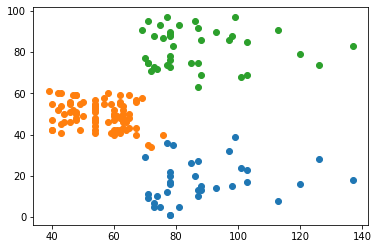

In [31]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.scatter(X[Y==2,0],X[Y==2,1])

plt.Xlabel["annual income"]
plt.Ylabel["Spendign score"]
plt.show()

### we have define 3 category 0,1,2 and show their spending score 

### Centroid Point

In [32]:
kmeans.cluster_centers_

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

### Visual

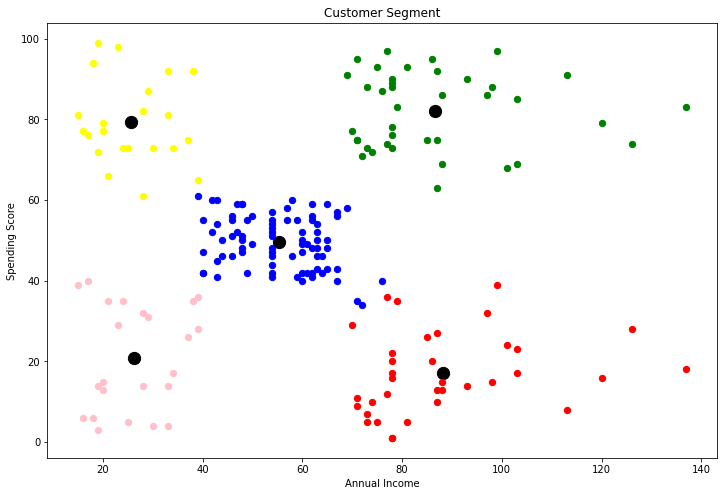

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150, c='black')
plt.scatter(X[Y==0,0], X[Y==0,1], s=40, c='red', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=40, c='blue', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=40, c='green', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=40, c='yellow', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=40, c='pink', label='Cluster 5')
plt.title('Customer Segment')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### the cluster which is in pink are the people who use have low income + spending 

In [34]:
cx_df["target"]=Y

In [35]:
cx_df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),target
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


## DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
dbscan = DBSCAN(eps=5, min_samples=5)   # Elsonon , Min sample = 5 E means it is the first radius where want to examineobject 

In [39]:
labels = dbscan.fit_predict(X)

In [41]:
np.unique(labels)    # it is noise 

array([-1,  0,  1,  2,  3,  4], dtype=int64)

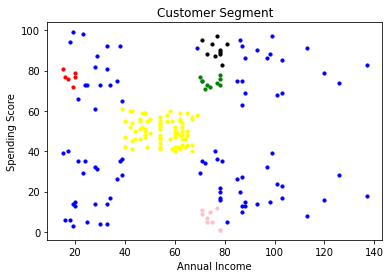

In [25]:
plt.scatter(X[labels==-1,0], X[labels==-1,1], s = 10, c='blue')

plt.scatter(X[labels== 0,0], X[labels== 0,1], s = 10, c='red')
plt.scatter(X[labels== 1,0], X[labels== 1,1], s = 10, c='yellow')
plt.scatter(X[labels== 2,0], X[labels== 2,1], s = 10, c='green')
plt.scatter(X[labels== 3,0], X[labels== 3,1], s = 10, c='pink')
plt.scatter(X[labels== 4,0], X[labels== 4,1], s = 10, c='black')
#plt.scatter(X[labels== 5,0], X[labels== 5,1], s = 10, c='brown')
plt.title('Customer Segment')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### in yellow cluster we see it is dense and rest of cluster it is scatter 

## Hierarchical Clusterring

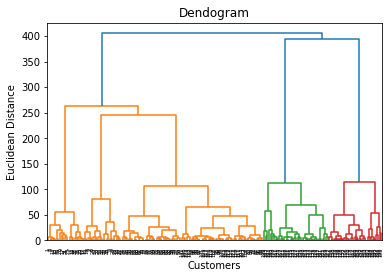

In [42]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X,method='ward')) 
plt.title('Dendogram')
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

### Interpretation:We can conclude from above using maximum Euclidiean distance ,we can see it has cluster is 5. 

In [30]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
Y_hc = hc.fit_predict(X)
Y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [31]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

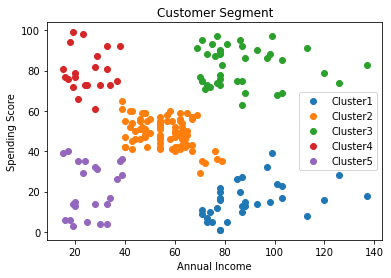

In [37]:
plt.scatter(X[Y_hc==0,0],X[Y_hc==0,1],label='Cluster1')
plt.scatter(X[Y_hc==1,0],X[Y_hc==1,1],label='Cluster2')
plt.scatter(X[Y_hc==2,0],X[Y_hc==2,1],label='Cluster3')
plt.scatter(X[Y_hc==3,0],X[Y_hc==3,1],label='Cluster4')
plt.scatter(X[Y_hc==4,0],X[Y_hc==4,1],label='Cluster5')
plt.title('Customer Segment')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

## We can see from above
- Cluster 1:High income and spenr less in shopping.
- Cluster 2:Have average income and spent average in shopping.
- Cluster 3:High income and spent more in  shopping,so it is out target audience.
- Cluster 4:Less income and spent more shopping.
- Cluster 5:Less income and do less shopping.